#**Random Forest**


## Experiment 4: Binary Classification with  with Random Forest

In this experiment, we will train a multi-class classifier using Random Forest

Dataset can be downloaded https://drive.google.com/drive/folders/1_50s_IxJsABTRFTWBR0XjuSOnDL4YFuQ

The steps are:
1.   Load and explore dataset
2.   Prepare Data
3.   Split Data
4.   Assess Baseline Model
5.   Train Initial RandomForest with Default Hyperparameter
6.   Reduce Overfitting with n_estimators
7.   Reduce Overfitting with max_depth
8.   Reduce Overfitting with min_samples_leaf
9.   Reduce Overfitting with max_features
10.  Features Importance
11. Hyperparameter tuning with Grid Search
12. Hyperparameter tuning with Random Search

### 1. Load and Explore Dataset

**[1.1]** Import the pandas and numpy package

In [ ]:
import pandas as pd
import numpy as np

**[1.2]** Mounting the drive

You must allow access to your drive by signing in to your Google account
In this notebook, I'm mounting the Google drive to read a csv file that is stored on my drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive". The below command lists the contents in the drive:
!ls "/content/drive/My Drive"

 AT2_default_template.gdoc
 atlassian_reviews.csv
 CNN_Articles_2021-2023.csv
 CNN_Articles_2021-2023.gsheet
'Colab Notebooks'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (1).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (2).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (3).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c.gsheet'
'Copy of MLAA - Lecture 1.gslides'
'Copy of MLAA - Lecture 2.gslides'
'Copy of MLAA - Lecture 5.gslides'
 data
'DSP_AT3 _REPORT.gdoc'
'DSP - Lab 4 - Exercise 1 - Solutions.gdoc'
 DVN_data
'Experiment reports'
'Experiment reports 2'
 glassdoor_data
 Lambda_Project_Report_Draft.gdoc
 NLP_data
'ODI Data Ethics Canvas.gdoc'
'Reddit_Data (1).csv'
 Untitled
'Untitled document (1).gdoc'
'Untitled document.gdoc'


**[1.3]** Load the prepared dataset

In [ ]:
X_train = pd.read_csv('/content/drive/My Drive/data/X_train.csv', index_col=0)
X_val = pd.read_csv('/content/drive/My Drive/data/X_val.csv', index_col=0)
X_test = pd.read_csv('/content/drive/My Drive/data/X_test.csv', index_col=0)
y_train = pd.read_csv('/content/drive/My Drive/data/y_train.csv', index_col=0)
y_val = pd.read_csv('/content/drive/My Drive/data/y_val.csv', index_col=0)
y_test = pd.read_csv('/content/drive/My Drive/data/y_test.csv', index_col=0)

**[1.4]** Display the first 5 rows of df

In [ ]:
X_train.head()

,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,gender_0,gender_Female,gender_Male
117183,2.0,2.0,1,1,1,3,2,2,2,1,2,3,2,0,1,0
80308,3.0,0.0,4,10,7,8,5,6,9,4,7,7,10,1,0,0
18279,4.0,2.0,5,9,10,10,10,10,10,4,10,3,10,0,1,0
9337,2.0,2.0,9,8,10,7,10,10,10,3,9,5,10,0,1,0
74816,5.0,0.0,8,2,6,3,10,10,3,10,3,1,3,1,0,0


## 2. Assess Baseline Model

**[2.1]** Find the mode of the target variable from the training set and print its value

In [ ]:
y_mode = y_train.mode()
y_mode

,Target
0,0


**[2.2]** Create a numpy array with the same dimensions as for the training set called `y_base` filled with this value



In [ ]:
y_shape = (len(X_train), 1)
y_base = np.full(y_shape, y_mode)

**[2.3]** Import the accuracy score from sklearn

In [ ]:
from sklearn.metrics import accuracy_score

**[2.4]** Display the accuracy score of this baseline model on the training set

In [ ]:
accuracy_score(y_train, y_base)

0.9730474443974232

## 3. Train Initial RandomForest with Default Hyperparameter

**[3.1]** Import the RandomForestClassifier from sklearn.ensemble

In [ ]:
from sklearn.ensemble import RandomForestClassifier

**[3.2]** Instantiate the RandomForestClassifier class called rf1 with a random state=8

In [ ]:
rf1 = RandomForestClassifier(random_state=42)

**[3.3]** Fit the RandomForest model

In [ ]:
rf1.fit(X_train, y_train)
y_train_preds = rf1.predict(X_train)
y_val_preds = rf1.predict(X_val)

<ipython-input-12-62207a8c33a7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train)


**[3.4]** Calculate the accuracy and f1 score of the RandomForest on the training and validation sets and print them

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

0.9999905957586872
0.9935680433310765
0.9998255103821323
0.8694158075601374


## 4. Reduce Overfitting with n_estimators

**[4.1]** Train a RandomForestClassifier model with n_estimators=50 and print the accuracy score and f1 score for the training and validation sets

In [ ]:
rf2_50 = RandomForestClassifier(random_state=42, n_estimators=50).fit(X_train, y_train)
y_train_preds = rf2_50.predict(X_train)
y_val_preds = rf2_50.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-15-c5b8084e1edb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2_50 = RandomForestClassifier(random_state=42, n_estimators=50).fit(X_train, y_train)


0.9999341703108102
0.9933141503046716
0.9987772925764191
0.8644939965694682


**[4.2]** Train a RandomForestClassifier model with n_estimators=100 and print the accuracy score and f1 score for the training and validation sets

In [ ]:
rf2_100 = RandomForestClassifier(random_state=42, n_estimators=100).fit(X_train, y_train)
y_train_preds = rf2_100.predict(X_train)
y_val_preds = rf2_100.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-16-e8ffc7033fe8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2_100 = RandomForestClassifier(random_state=42, n_estimators=100).fit(X_train, y_train)


0.9999905957586872
0.9935680433310765
0.9998255103821323
0.8694158075601374


**[4.3]** Train a RandomForestClassifier model with n_estimators=150 and print the accuracy score and f1 score for the training and validation sets

In [ ]:
rf2_150 = RandomForestClassifier(random_state=42, n_estimators=150).fit(X_train, y_train)
y_train_preds = rf2_150.predict(X_train)
y_val_preds = rf2_150.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-17-4863c6da7e5e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2_150 = RandomForestClassifier(random_state=42, n_estimators=150).fit(X_train, y_train)


0.9999905957586872
0.9933987813134733
0.9998255103821323
0.865979381443299


**[4.4]** Train a RandomForestClassifier model with n_estimators=200 and print the accuracy score and f1 score for the training and validation sets

In [ ]:
rf2_200 = RandomForestClassifier(random_state=42, n_estimators=200).fit(X_train, y_train)
y_train_preds = rf2_200.predict(X_train)
y_val_preds = rf2_200.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-18-2fa59ec7ceff>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2_200 = RandomForestClassifier(random_state=42, n_estimators=200).fit(X_train, y_train)


0.9999905957586872
0.9938219363574814
0.9998255103821323
0.8752136752136752


**[4.5]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[4.6]** Plot the confusion matrics for the training, validation

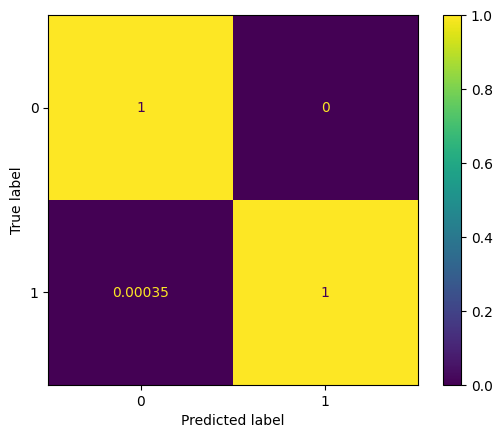

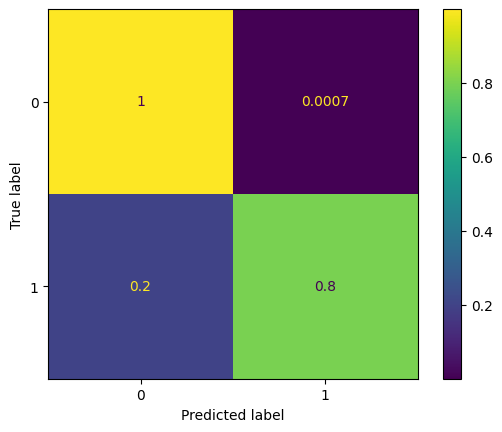

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf2_200, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf2_200, X_val, y_val, normalize='true')

## 5. Reduce Overfitting with max_depth

**[5.1]** Print the average "**max_depth**" for rf2_200:

In [ ]:
np.mean([estimator.tree_.max_depth for estimator in rf2_200.estimators_])

26.1

**[5.2]** Train a RandomForestClassifier model with n_estimators=200, max_depth=10 and print the accuracy score and f1 score for the training and validation sets

In [ ]:
rf3 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10).fit(X_train, y_train)
y_train_preds = rf3.predict(X_train)
y_val_preds = rf3.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-22-36a10365dc44>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf3 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10).fit(X_train, y_train)


0.9930220529458786
0.9913676371022343
0.8524264120922832
0.8131868131868131


**[5.3]** Train a RandomForestClassifier model with n_estimators=200, max_depth=20 and print the accuracy score and f1 score for the training and validation sets

In [ ]:
rf4 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20).fit(X_train, y_train)
y_train_preds = rf4.predict(X_train)
y_val_preds = rf4.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-23-052392f8d21e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf4 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20).fit(X_train, y_train)


0.9996520430714252
0.9942450914014895
0.9935030728709394
0.8843537414965986


**[5.4]** Train a RandomForestClassifier model with n_estimators=200, max_depth=30 and print the accuracy score and f1 score for the training and validation sets

In [ ]:
rf5 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=30).fit(X_train, y_train)
y_train_preds = rf5.predict(X_train)
y_val_preds = rf5.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-24-59fb6fb54110>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf5 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=30).fit(X_train, y_train)


0.9999905957586872
0.9937373053486798
0.9998255103821323
0.8732876712328766


**[5.5]** Plot the confusion matrics for the training, validation

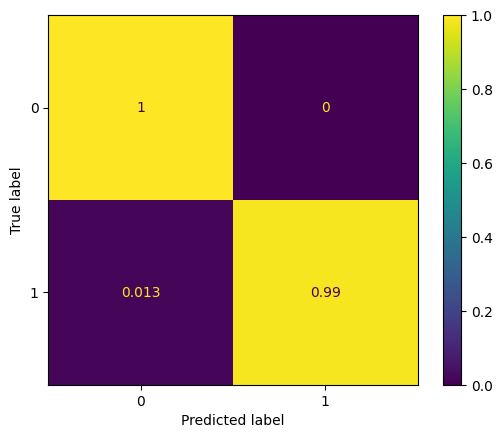

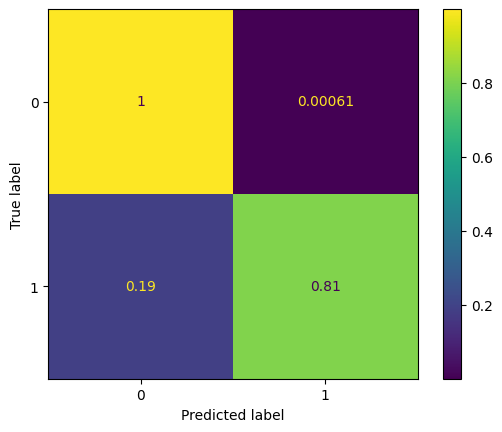

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf4, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf4, X_val, y_val, normalize='true')

## 6.   Reduce Overfitting with min_samples_leaf

**[6.1]** Train a RandomForestClassifier model with n_estimators=200, max_depth=20, min_samples_leaf=1 and print the accuracy score and f1 score for the training and validation sets

In [ ]:
rf6 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=1).fit(X_train, y_train)
y_train_preds = rf6.predict(X_train)
y_val_preds = rf6.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-26-3f92eee34db5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf6 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=1).fit(X_train, y_train)


0.9996520430714252
0.9942450914014895
0.9935030728709394
0.8843537414965986


**[6.2]** Train a RandomForestClassifier model with n_estimators=200, max_depth=20, min_samples_leaf=10 and print the accuracy score and f1 score for the training and validation sets

In [ ]:
rf7 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=10).fit(X_train, y_train)
y_train_preds = rf7.predict(X_train)
y_val_preds = rf7.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-27-0590827f4a5a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf7 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=10).fit(X_train, y_train)


0.9934358395636432
0.9917907921462423
0.86488579171506
0.8258527827648114


**[6.3]** Train a RandomForestClassifier model with n_estimators=200, max_depth=20, min_samples_leaf=5 and print the accuracy score and f1 score for the training and validation sets

In [ ]:
rf8 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=5).fit(X_train, y_train)
y_train_preds = rf8.predict(X_train)
y_val_preds = rf8.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-28-95ceefcb88b0>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf8 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=5).fit(X_train, y_train)


0.9951003902760145
0.9928063642518619
0.9017537243069961
0.8506151142355007


**[6.4]** Plot the confusion matrics for the training, validation

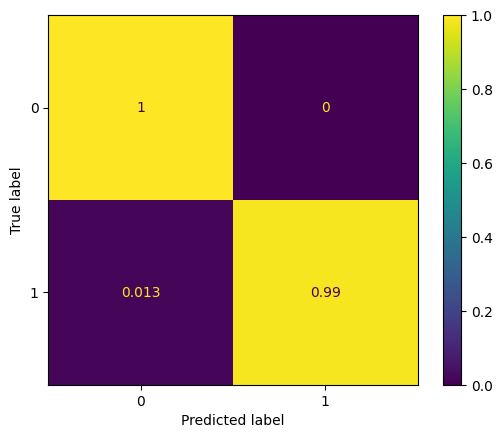

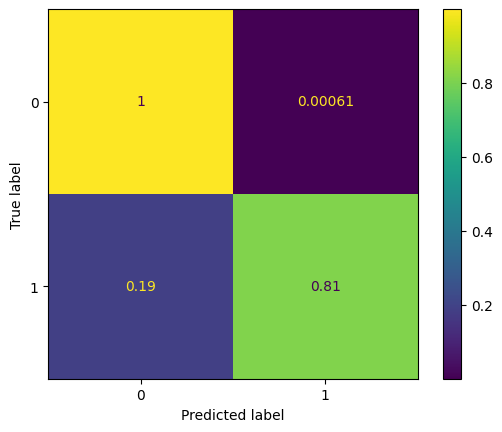

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf6, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf6, X_val, y_val, normalize='true')

## 7.   Reduce Overfitting with max_features

**[7.1]** Train a RandomForestClassifier model with n_estimators=200, max_depth=20, min_samples_leaf=1, max_features=2 and print the accuracy score and f1 score for the training and validation sets

In [ ]:
rf9 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=1, max_features=2).fit(X_train, y_train)
y_train_preds = rf9.predict(X_train)
y_val_preds = rf9.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-30-50712f47729d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf9 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=1, max_features=2).fit(X_train, y_train)


0.9995015752104199
0.9922139471902505
0.9906673710160239
0.8362989323843416


**[7.2]** Train a RandomForestClassifier model with n_estimators=200, max_depth=20, min_samples_leaf=1, max_features=5 and print the accuracy score and f1 score for the training and validation sets

In [ ]:
rf10 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=1, max_features=5).fit(X_train, y_train)
y_train_preds = rf10.predict(X_train)
y_val_preds = rf10.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-31-2bfe3669e100>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf10 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=1, max_features=5).fit(X_train, y_train)


0.9997178727606151
0.9941604603926879
0.9947386881795861
0.883248730964467


**[7.3]** Train a RandomForestClassifier model with n_estimators=200, max_depth=20, min_samples_leaf=1, max_features= 10 and print the accuracy score and f1 score for the training and validation sets

In [ ]:
rf11 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=1, max_features=10).fit(X_train, y_train)
y_train_preds = rf11.predict(X_train)
y_val_preds = rf11.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-32-3b9c999f91e3>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf11 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=1, max_features=10).fit(X_train, y_train)


0.9998965533455588
0.9936526743398781
0.998077259220416
0.8739495798319327


**[7.4]** Train a RandomForestClassifier model with n_estimators=200, max_depth=20, min_samples_leaf=1, max_features= 15 and print the accuracy score and f1 score for the training and validation sets

In [ ]:
rf12 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=1, max_features=15).fit(X_train, y_train)
y_train_preds = rf12.predict(X_train)
y_val_preds = rf12.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-33-6b40c59c3120>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf12 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=1, max_features=15).fit(X_train, y_train)


0.9999247660694973
0.993906567366283
0.9986023759608665
0.8795986622073578


**[7.5]** Train a RandomForestClassifier model with n_estimators=200, max_depth=20, min_samples_leaf=1, max_features= 20 and print the accuracy score and f1 score for the training and validation sets

In [ ]:
rf13 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=1, max_features=20).fit(X_train, y_train)
y_train_preds = rf13.predict(X_train)
y_val_preds = rf13.predict(X_val)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

<ipython-input-34-a1f9a038986b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf13 = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=1, max_features=20).fit(X_train, y_train)


0.9999247660694973
0.9941604603926879
0.9986023759608665
0.8851913477537438


**[7.6]** Plot the confusion matrics for the training, validation

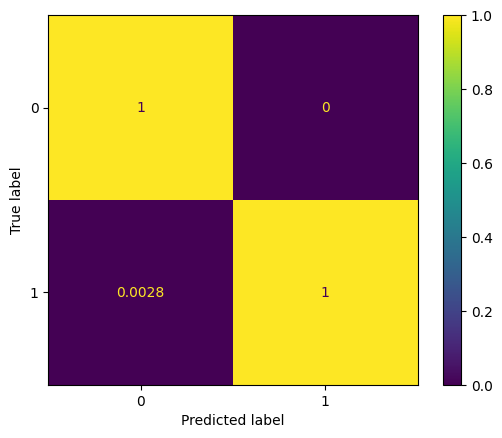

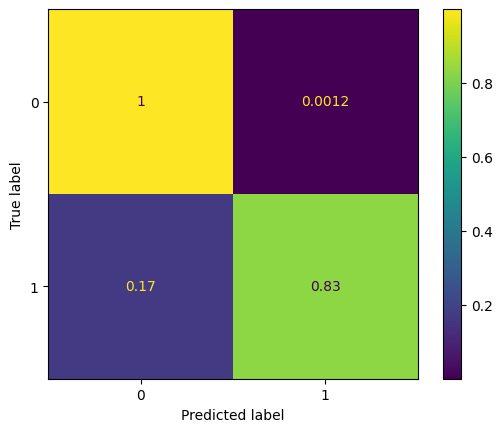

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf13, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf13, X_val, y_val, normalize='true')

**[7.7]** Print the accuracy score and f1 score of the best model on the testing set

In [ ]:
y_test_preds = rf13.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds))

0.9935252894576477
0.8657187993680884


**[7.8]** Plot the confusion matrics for the training, validation and testing sets

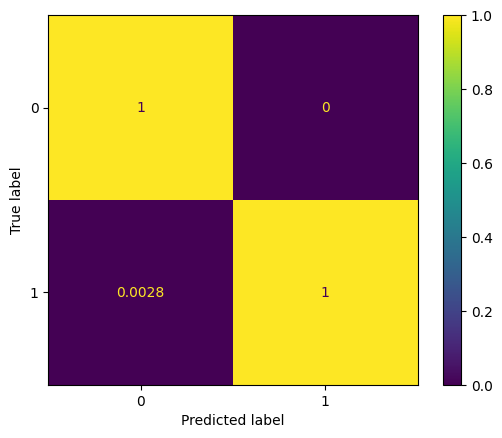

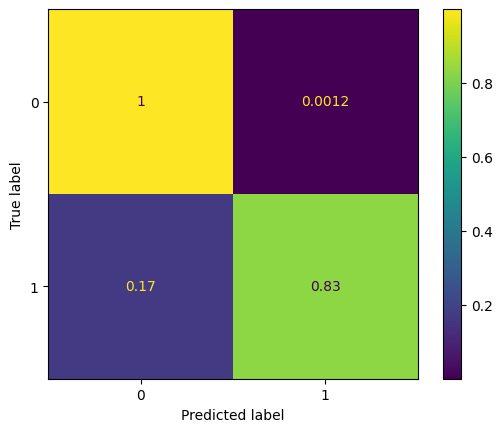

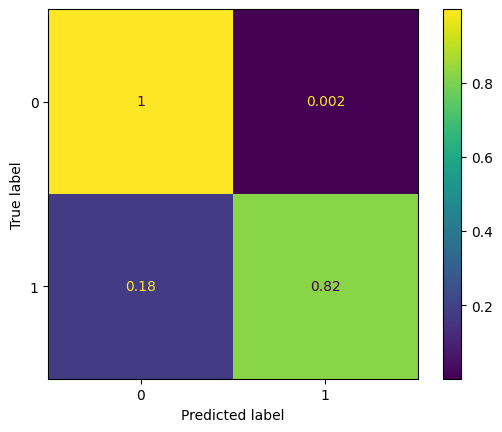

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf13, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf13, X_val, y_val, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf13, X_test, y_test, normalize='true')

## 8.  Features Importance


**[8.1]** Task: Print the features importance of rf13

In [ ]:
rf13.feature_importances_

array([0.0231097 , 0.00826194, 0.08538895, 0.05488603, 0.06425761,
       0.03121201, 0.02334842, 0.06517947, 0.11342451, 0.25033255,
       0.08655826, 0.06084986, 0.09384493, 0.03022549, 0.00307879,
       0.00604149])

**[8.2]** Create a Dataframe with these values

In [ ]:
feat_imp_rf_df = pd.DataFrame(
    {
        'feature': X_train.columns,
     'feature_importance': rf13.feature_importances_
     }
)

In [ ]:
feat_imp_rf_df

,feature,feature_importance
0,car_model,0.023110
1,car_segment,0.008262
2,age_of_vehicle_years,0.085389
3,sched_serv_warr,0.054886
4,non_sched_serv_warr,0.064258
5,sched_serv_paid,0.031212
6,non_sched_serv_paid,0.023348
7,total_paid_services,0.065179
8,total_services,0.113425
9,mth_since_last_serv,0.250333


**[8.3]** Sort the previous dataframe and reset its index

In [ ]:
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)

**[8.4]** Display the first 10 rows of this dataframe 

In [ ]:
feat_imp_rf_df.head(10)

,feature,feature_importance
0,mth_since_last_serv,0.250333
1,total_services,0.113425
2,num_serv_dealer_purchased,0.093845
3,annualised_mileage,0.086558
4,age_of_vehicle_years,0.085389
5,total_paid_services,0.065179
6,non_sched_serv_warr,0.064258
7,num_dealers_visited,0.060850
8,sched_serv_warr,0.054886
9,sched_serv_paid,0.031212


**[8.5]** We can visualise this information on a graph

In [ ]:
import altair as alt

alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)

## 9. Hyperparameter Tuning with Grid Search

**[9.1]** Import GridSearchCV from sklearn.model_selection

In [ ]:
from sklearn.model_selection import GridSearchCV

**[9.2]** Let's create a dictionary containing the grid search parameters

In [ ]:
hyperparams_grid = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': np.arange(10, 30, 5),
    'min_samples_leaf': np.arange(1, 10, 1),
    'max_features':  np.arange(5, 15, 5)
    }
hyperparams_grid

{'n_estimators': array([ 50, 100, 150]),
 'max_depth': array([10, 15, 20, 25]),
 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'max_features': array([ 5, 10])}

**[9.3]** Import the RandomForestClassifier from sklearn.ensemble and instantiate the RandomForestClassifier class called rf with a random state=42

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state= 42)

**[9.4]** Instantiate a GridSearchCV with the hyperparameter grid and the random forest model with cross validation instance = 2

In [ ]:
grid_search_rf = GridSearchCV(rf, hyperparams_grid, cv=2, verbose=1)

**[9.5]** Fit the GridSearchCV on the training set

In [ ]:
grid_search_rf.fit(X_train, y_train)

Fitting 2 folds for each of 216 candidates, totalling 432 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': array([10, 15, 20, 25]),
                         'max_features': array([ 5, 10]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([ 50, 100, 150])},
             verbose=1)

**[9.6]** Display the best set of hyperparameters

In [ ]:
grid_search_rf.best_params_

{'max_depth': 15,
 'max_features': 10,
 'min_samples_leaf': 1,
 'n_estimators': 150}

**[9.7]** Display the accuracy score and f1 score on all 3 sets

In [ ]:
y_train_preds = grid_search_rf.predict(X_train)
y_val_preds = grid_search_rf.predict(X_val)
y_test_preds = grid_search_rf.predict(X_test)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))
print(f1_score(y_test, y_test_preds))

0.9983354492876287
0.9935680433310765
0.9944393662400975
0.9681482814468239
0.872053872053872
0.8832


**[9.8]** Plot the confusion matrics for the training, validation and testing sets

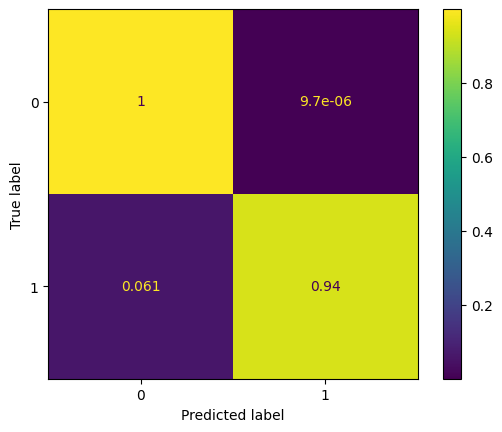

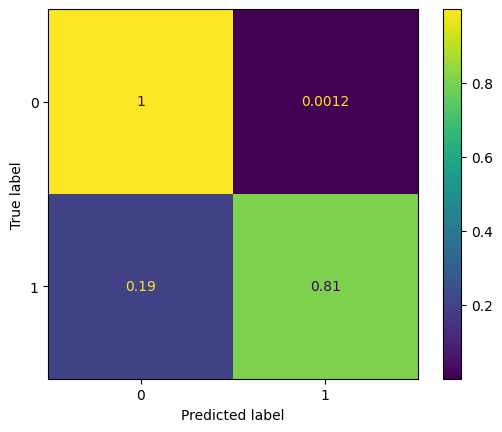

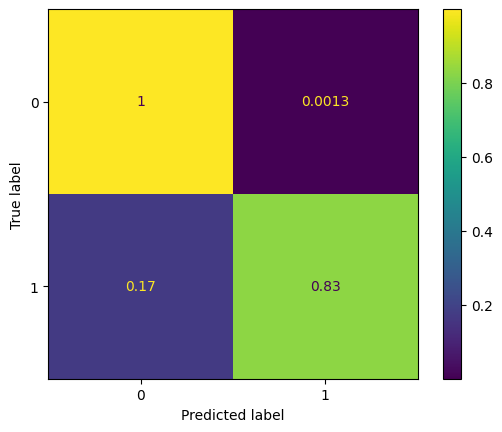

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_search_rf, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(grid_search_rf, X_val, y_val, normalize='true')
ConfusionMatrixDisplay.from_estimator(grid_search_rf, X_test, y_test, normalize='true')

## 10. Hyperparameter Tuning with Random Search

**[10.1]** Import randint from scipy.stats 

In [ ]:
from scipy.stats import randint

**[10.2]** Let's define the hyperparameters value randomly

In [ ]:
hyperparams_dist = {
    'n_estimators': randint(50, 200, 50),
    'max_depth': randint(10, 30, 5),
    'min_samples_leaf': randint(1, 10, 1),
    'max_features':  randint(5, 15, 5)
    }

**[10.3]** Import RandomizedSearchCV and KFold from sklearn.model_selection

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold

**[10.4]** Instantiate a KFold with 5 splits

In [ ]:
kf_cv = KFold(n_splits=5)

**[10.5]** Instantiate a RandomizedSearchCV with the hyperparameter values and the random forest model

In [ ]:
random_search_rf = RandomizedSearchCV(rf, hyperparams_dist, random_state= 42, cv=kf_cv, verbose=1)

**[10.6]** Fit the RandomizedSearchCV on the training set

In [ ]:
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2a6e97acb0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2a6e97b070>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2a6e97b700>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2a6e95e680>},
                   random_state=42, verbose=1)

**[10.7]** Display the best set of hyperparameters

In [ ]:
random_search_rf.best_params_

{'max_depth': 18,
 'max_features': 18,
 'min_samples_leaf': 3,
 'n_estimators': 108}

**[10.8]** Display the accuracy score and f1 score on all 3 sets

In [ ]:
y_train_preds = random_search_rf.predict(X_train)
y_val_preds = random_search_rf.predict(X_val)
y_test_preds = random_search_rf.predict(X_test)
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))
print(f1_score(y_test, y_test_preds))

0.9968871961254526
0.99322951929587
0.9935252894576477
0.9396315885464163
0.864406779661017
0.8644338118022329


**[10.9]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[10.10]** Plot the confusion matrics for the training, validation and testing sets

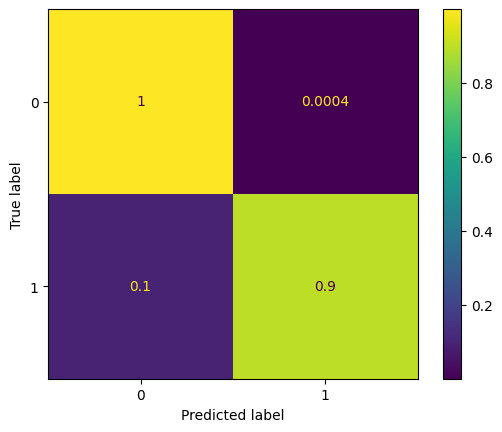

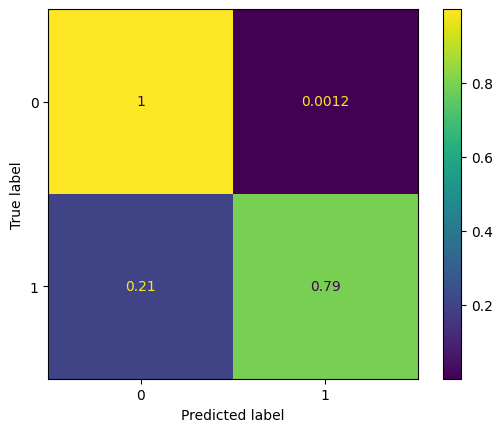

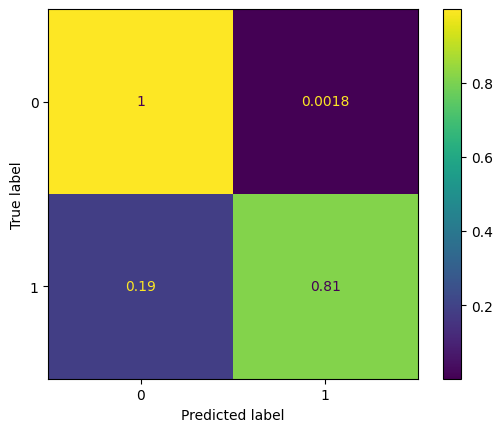

In [ ]:
ConfusionMatrixDisplay.from_estimator(random_search_rf, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(random_search_rf, X_val, y_val, normalize='true')
ConfusionMatrixDisplay.from_estimator(random_search_rf, X_test, y_test, normalize='true')